# CellRank2 analysis of TE002 (VIPERKernel)

CellRank2 analysis of TE002 using CellRank2 VIPER-Based Kernel

### a) Import packages and data

Setup path to data-containing folder and savings and parameters

In [1]:
# a.1) setup path to data-containing folder and savings and parameters
h5ad_path = "/Users/AlexanderWang/Desktop/ics-rebuttal/TE002-h5ad/"
figures_dir = "/Users/AlexanderWang/Desktop/ics-rebuttal/figures/"
figures_dir_VIPERKernel = "/Users/AlexanderWang/Desktop/ics-rebuttal/figures/CR2_VIPERKernel/"
figures_dir_TE002 = "/Users/AlexanderWang/Desktop/ics-rebuttal/figures/CR2_VIPERKernel/TE002/"

n_macro_CytoTRACE = 8 # number of macrostates 

Import packages and set markers of interest

In [2]:
# a.2) packages
import sys
import cellrank as cr
from VIPERKernel import VIPERKernel
import scanpy as sc
import anndata
import numpy as np
import pandas as pd
import os
from matplotlib import rc_context
import matplotlib.pyplot as plt
sc.settings.set_figure_params(frameon=False, dpi=100)
cr.settings.verbosity = 2

import warnings
warnings.simplefilter("ignore", category=UserWarning)

cytotrace_markers = ['Smarca5','Rbbp7','Tcerg1','Hnrnpd','Hmg20b','Nelfe','Ube2i','Etv5','Ubn1','Mbd3','Dek','Maz',
                     'Itgb3bp','Ilf2','Pa2g4'] # Id3','Hnf4g','Atoh1','Spdef','Neurod1' markers upregulated in cytotrace (Fig 1e) 

Load VIPER data and metadata for TE002. Setup UMAP coordinates for UMAP visualization

In [12]:
# a.3) load VIPER data
TE002_viper = pd.read_csv(h5ad_path + "TE002_viper.csv", index_col = 0).T
adata = anndata.AnnData(TE002_viper)

# a.4) load metadata for TE002
metadata_csv = h5ad_path + "rad-metadata-ingest.csv"
metadata = pd.read_csv(metadata_csv)

In [13]:
# a.5) process metadata in adata
adata.obs.index.names = ['cell_id']
cells_to_analyze = metadata['cell_id'] # cells to analyze
adata = adata[adata.obs_names.isin(cells_to_analyze)] # subset cells to analyze in adata

adata.obs = pd.merge(adata.obs, metadata, on='cell_id', how='left').set_index('cell_id') # merge metadata and include into counts object
adata.obs['iter_cluster_id_with_paneth'] = adata.obs['iter_cluster_id_with_paneth'].astype('category') # VIPER clusters as categorical variable

# a.6) set UMAP coordinates to those obtained at protein activty
umap_coordinates = np.array(adata.obs.loc[:, ['UMAP_1','UMAP_2']]) 
adata.obsm['X_umap'] = umap_coordinates

# a.7) Include metadata of terminal states for CellRank analysis
adata.obs['terminal_states'] = adata.obs['iter_cluster_id_with_paneth']
adata.obs['terminal_states'].iloc[adata.obs['terminal_states'].isin(["stem-1","stem-2"])] = np.nan

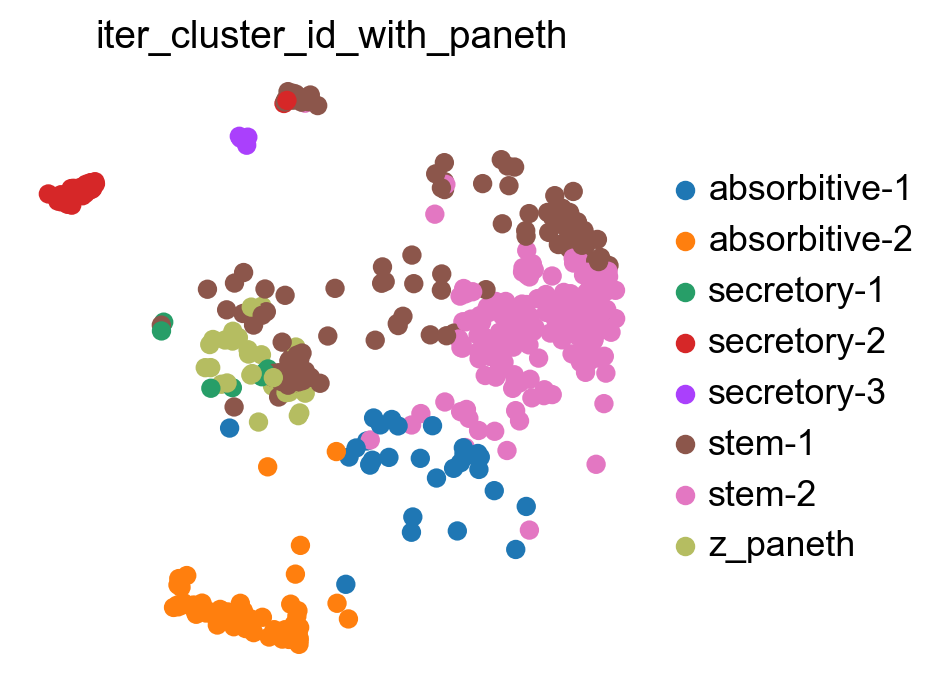

In [14]:
sc.pl.umap(adata, color=["iter_cluster_id_with_paneth"])

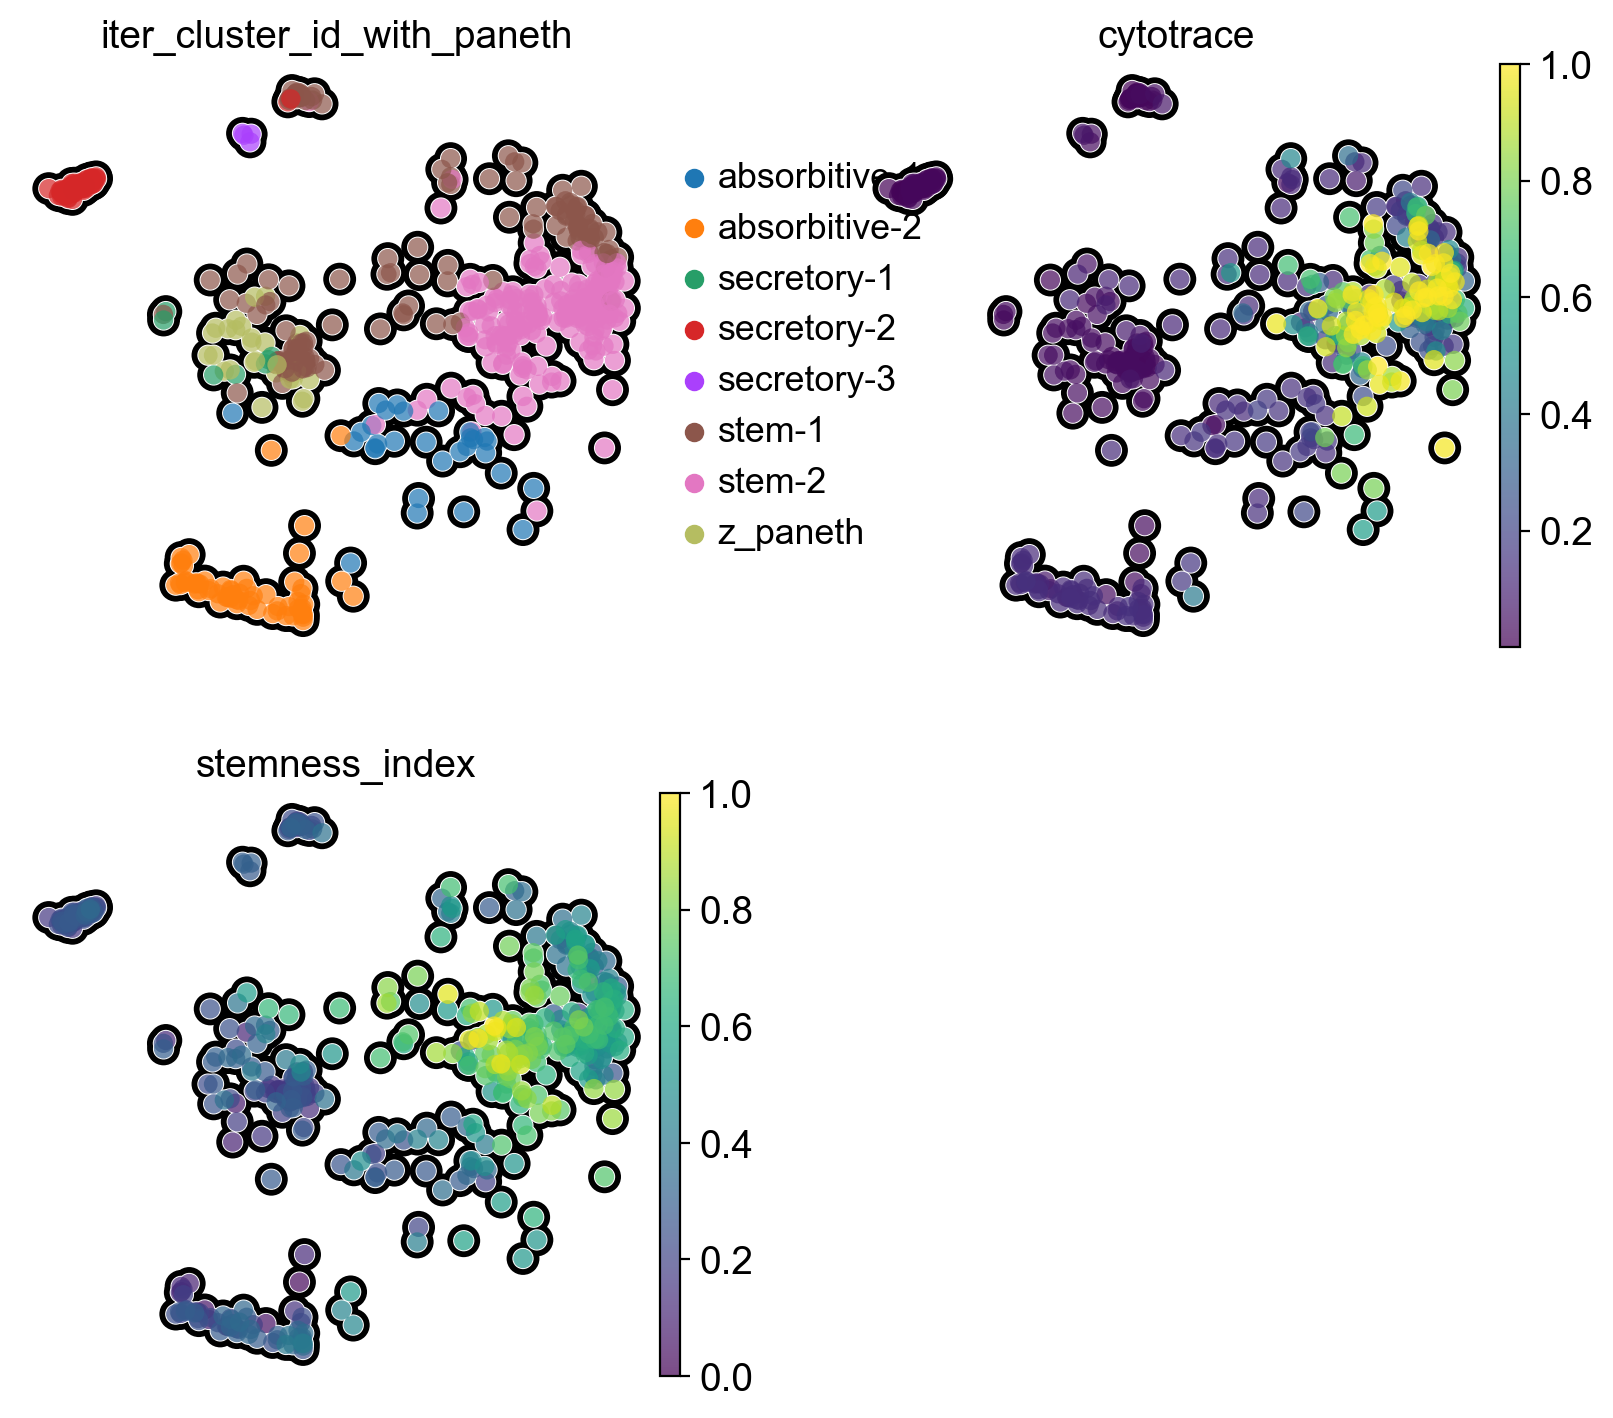

In [15]:
sc.pl.umap(adata, color=["iter_cluster_id_with_paneth","cytotrace","stemness_index"], ncols=2, add_outline=True)

Preprocess data for CellRank2 analysis

In [16]:
### b) Preprocess the data 
print("Preprocessing counts matrix for CellRank 2 analysis")
sc.tl.pca(adata, random_state=0)
sc.pp.neighbors(adata, random_state=0)

Preprocessing counts matrix for CellRank 2 analysis


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


## CellRank2 analysis with CytoTRACE Kernel

Compute transition matrix using our VIPER-based kernel for CellRank2 analysis

In [17]:
##########################################################################################################
##########################################################################################################
### CellRank2 analysis with VIPER-based Kernel
##########################################################################################################
##########################################################################################################

### c) VIPER-based Kernel
# c.1) Setup kernel
print("Working with VIPER-based kernel")
vpk = VIPERKernel(adata)

Working with VIPER-based kernel


100%|███████████████████████████████████████| 619/619 [00:00<00:00, 2442.89it/s]


In [18]:
# c.2) Set up figure directories
if os.path.exists(figures_dir):
    print("'figures_dir' directory already exists")
else:
    os.mkdir(figures_dir)

if os.path.exists(figures_dir_VIPERKernel):
    print("'figures_dir_VIPERKernel' directory already exists")
else:
    os.mkdir(figures_dir_VIPERKernel)

if os.path.exists(figures_dir_TE002):
    print("'figures_dir_TE002' directory already exists")
else:
    os.mkdir(figures_dir_TE002)

'figures_dir' directory already exists
'figures_dir_VIPERKernel' directory already exists


Simulate random walk on the Markov Chain implied by the transition matrix. Starting cells are selected at random. In the first figure, starting cells are selected randomly from all clusters. In figures 2 and 3 they are randomly sampled from the 'stem-1' and 'stem-2' clusters. 100 trajectories are simulated in each Random Walk. Black dots = cells of departure; yellow dots = cells of arrival.

Simulating `100` random walks of maximum length `155`


  0%|          | 0/100 [00:00<?, ?sim/s]

    Finish (0:00:00)
Plotting random walks
Simulating `100` random walks of maximum length `155`


  0%|          | 0/100 [00:00<?, ?sim/s]

    Finish (0:00:00)
Plotting random walks
Simulating `100` random walks of maximum length `155`


  0%|          | 0/100 [00:00<?, ?sim/s]

    Finish (0:00:00)
Plotting random walks


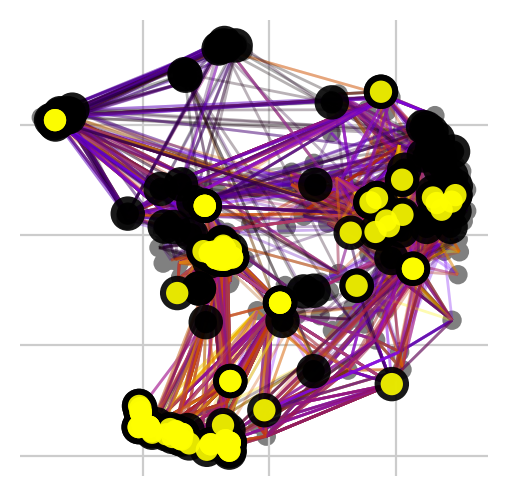

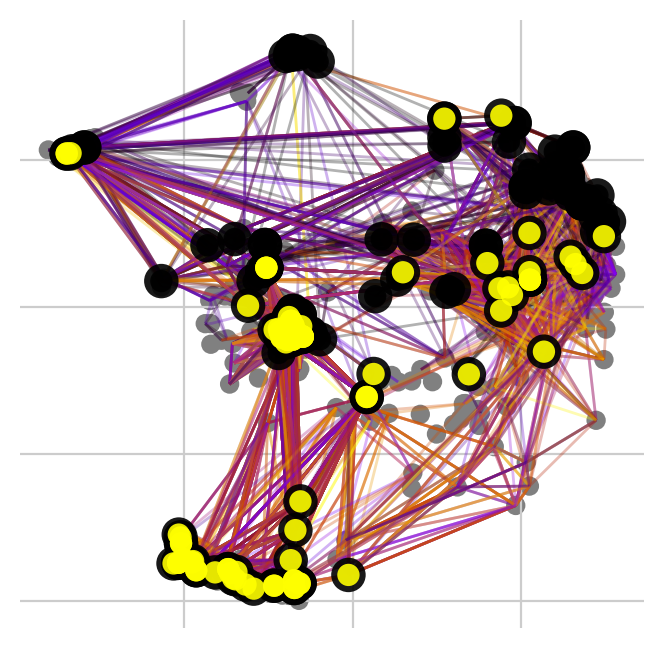

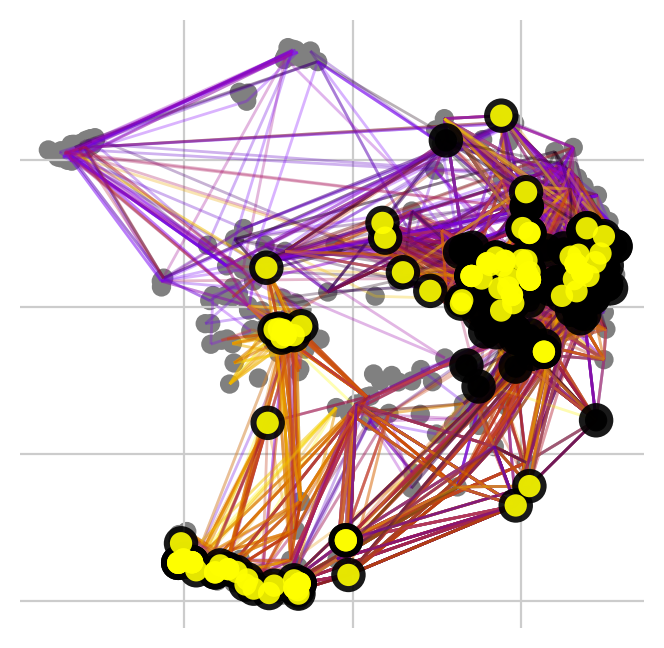

In [19]:
# c.3) Simulate a random walk on the Markov chain implied by the transition matrix 
vpk_rw_figure = figures_dir_TE002 + "VIPERKernel_random_walk.pdf"
vpk.plot_random_walks(
    seed=0,
    n_sims=100,
    start_ixs=None,
    legend_loc="right",
    dpi=100,
    save=vpk_rw_figure,
    figsize=(3,3)
)

# c.4) Simulate a random walk on the Markov chain implied by the transition matrix 
# sampling cells randomly among all clusters
vpk_rw_figure = figures_dir_TE002 + "VIPERKernel_random_walk_stem-1.pdf"
vpk.plot_random_walks(
    seed=0,
    n_sims=100,
    start_ixs={'iter_cluster_id_with_paneth':'stem-1'},
    legend_loc="right",
    dpi=100,
    save=vpk_rw_figure
)

# c.5) visualize the transition matrix
# sampling cells randomly from stem-1 population
vpk_rw_figure = figures_dir_TE002 + "VIPERKernel_random_walk_stem-2.pdf"
vpk.plot_random_walks(
    seed=0,
    n_sims=100,
    start_ixs={'iter_cluster_id_with_paneth': "stem-2"},
    legend_loc="right",
    dpi=100,
    save=vpk_rw_figure
)


Visualize the projected Transition Probability matrix on the UMAP, with clusters colored at gene expression (panel 1) and protein activity (panel 2). Also, show what we consider as the most differentiated states in the dataset (panel 3).

Projecting transition matrix onto `umap`
Adding `adata.obsm['T_fwd_umap']`
    Finish (0:00:00)
saving figure to file /Users/AlexanderWang/Desktop/ics-rebuttal/figures/CR2_VIPERKernel/TE002/VIPERKernel_differentiation_pa_clusters.svg


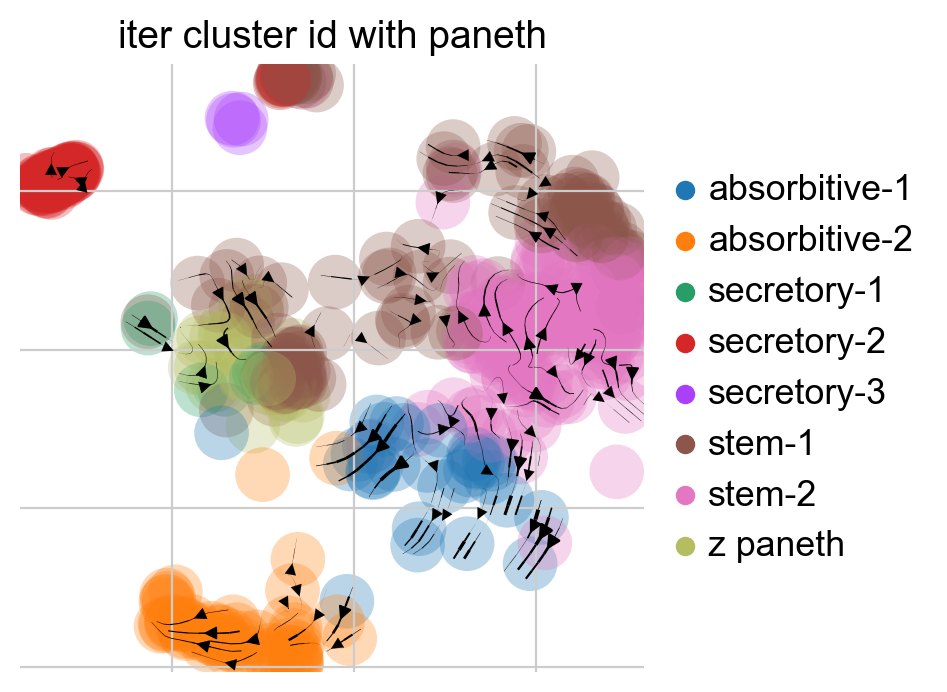

Using precomputed projection `adata.obsm['T_fwd_umap']`
saving figure to file /Users/AlexanderWang/Desktop/ics-rebuttal/figures/CR2_VIPERKernel/TE002/VIPERKernel_differentiation_cytotrace.svg


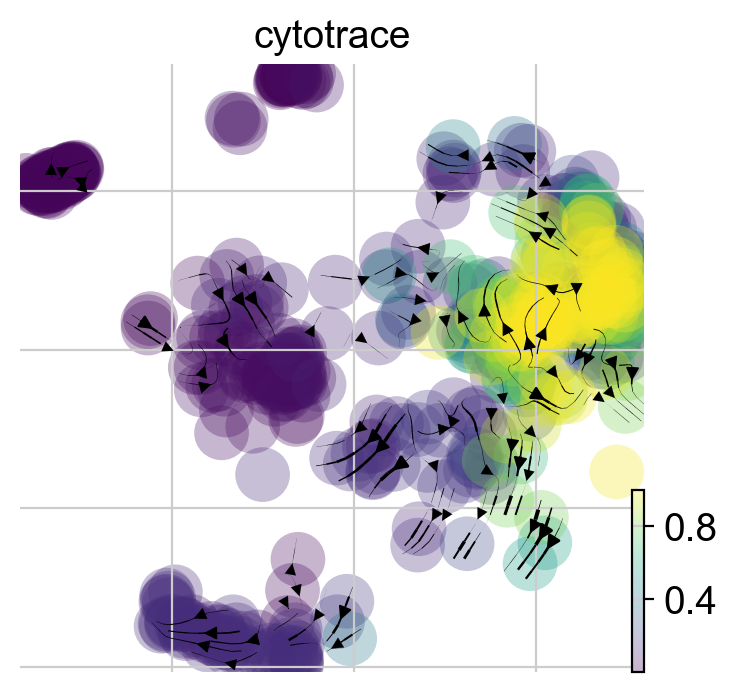

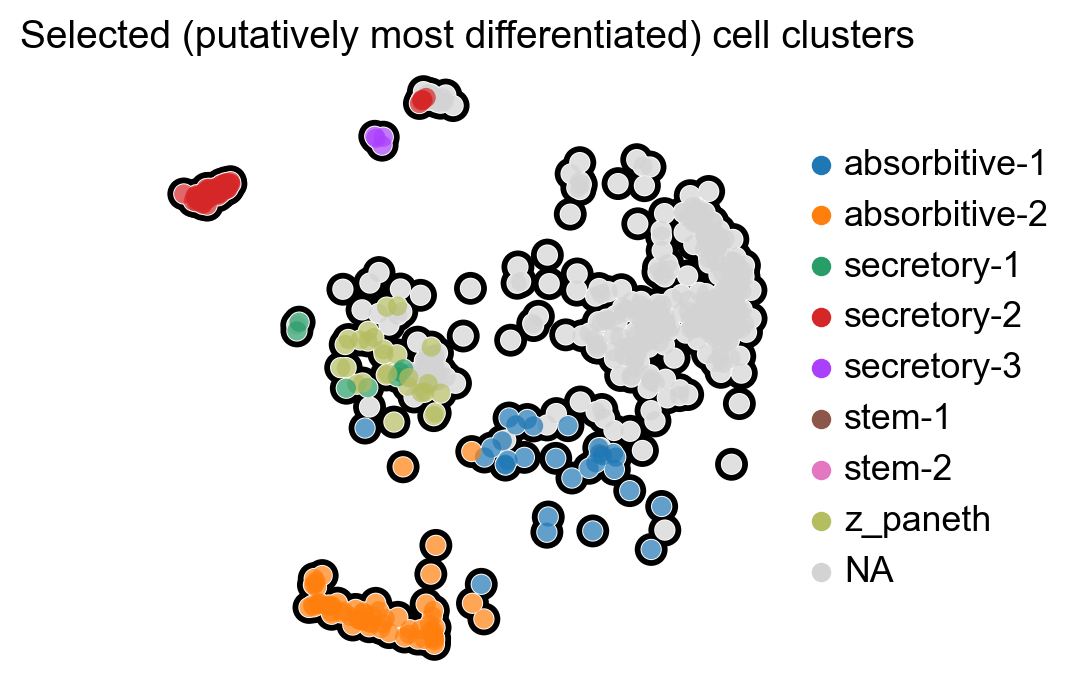

In [20]:
# c.6) visualize the transition matrix
differentiation_figure = figures_dir_TE002 + "VIPERKernel_differentiation_pa_clusters.svg"
vpk.plot_projection(basis="umap",
                    color = "iter_cluster_id_with_paneth", 
                    legend_loc="right", save=differentiation_figure, show=True)

differentiation_figure = figures_dir_TE002 + "VIPERKernel_differentiation_cytotrace.svg"
vpk.plot_projection(basis="umap",
                    color="cytotrace", 
                    legend_loc="right", save=differentiation_figure, show=True)

# c.7) Check terminal states from annotations
annotated_terminal_states_figure = figures_dir_TE002 + "annotated_terminal_states.pdf"
sc.pl.embedding(adata, basis="umap", color="terminal_states", add_outline=True, title="Selected (putatively most differentiated) cell clusters") 
#####################